In [1]:
import numpy as np
import pandas as pd
import numpy.random as rnd
import matplotlib.pyplot as plt

# 10 Armed bandit

### A total of 10 different static slot machines are presented to an Agent 

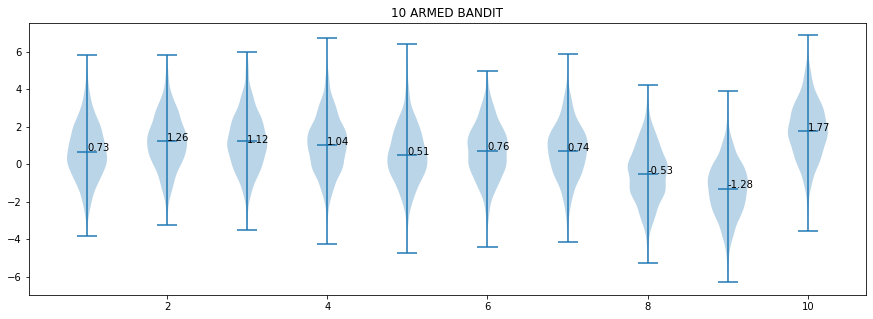

In [52]:
n_bandits = 10
mu_lst = np.random.normal(0, 1.5, n_bandits)
k_arms = [np.random.normal(mu, 1.5, 1000) for mu in mu_lst]

plt.figure(figsize=(15,5))
plt.title(f"{n_bandits} ARMED BANDIT")
plt.violinplot(k_arms, showmeans=True)
for i, mu in enumerate(mu_lst):
    plt.text(i+1, mu, round(mu, 2))
    
plt.show()

#### In the above example *the last slot* has the best average yield but 2, 3, 4 & 5 could also appear hot, especially 4 having a high max
## The agent wants maximised earnings and find an optimal policy while doing so

Instead of keeping a history of returns per slot machine, calculate mean return using **incremental implementation**

$NewEstimate \leftarrow OldEstimate + StepSize [Target - OldEstimate]$ where $StepSize \rightarrow \frac{1}{Count}$

In [177]:
quality = [0 for _ in range(n_bandits)]
counter = [0 for _ in range(n_bandits)]
action_space = {k:[] for k in range(n_bandits)}

n_iter = 1000
epsilon = 0.1
total_reward = 0
for i in range(n_iter):
    # Pull the current best slot with 10% chance to pick a random one
    action = rnd.choice(list(action_space)) if 1-epsilon < rnd.random() else np.argmax(quality)
    reward = rnd.choice(k_arms[action])
    total_reward += reward
    
    if i==0: print(f"First arm pulled: {action} for {round(reward, 2)} points")
    
    # Increment the slot's counter and calculate the incremental average 
    counter[action] += 1
    quality[action] += (1/counter[action])*(reward-quality[action])
    
    # Save all the slot qualities for a time step visualization
    for a in action_space:
        action_space[a].append(quality[a])

print(f"Accumulated a total of {round(total_reward, 2)} points over {n_iter} iterations")

First arm pulled: 0 for -2.4 points
Accumulated a total of 1513.28 points over 1000 iterations


# Final Score and counter per slot machine after a 1000 games

### Notice here the low scoring slots not having a lot of count (maximised winnings)

In [178]:
pd.DataFrame(list(zip(counter, quality)), columns=["Count", "Score"]).sort_values("Score", ascending=False)

,Count,Score
9,673,1.760103
2,229,1.349244
3,14,0.860145
1,16,0.770461
4,9,0.654649
6,10,0.539931
0,12,0.017941
5,6,-0.235735
7,21,-0.364667
8,10,-0.705324


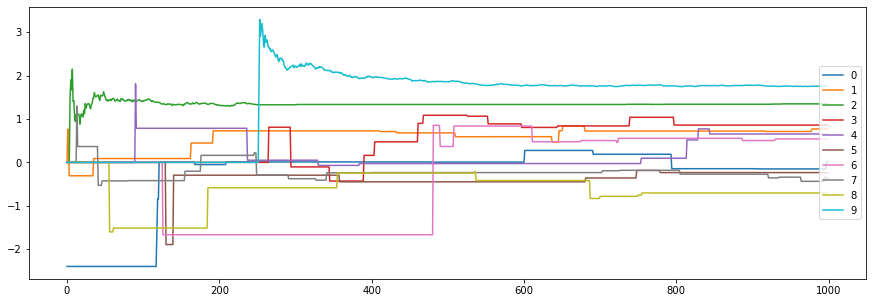

In [181]:
pd.DataFrame(action_space).plot(figsize=(15,5))
plt.legend(loc="right"); plt.show()

- The agent **first pulled the dark blue slot** (first argmax of zeros) that yielded a **bad reward** and is not randomly selected again untill ~150
- Similarly pink receives a low score and isn't updated again until halfway where all start to **average out**
- Early game **green returns a high reward** so it is naturally **selected 90%** of the time, leaving **10%** actions for exploration
- Purple **once** had a decent score which made it **favourable over green** but dropped again straight after
- Finally **after ~300 turns blue** is picked randomly and **dominates till the end** (still 10% going to exploration)

#### Notice the law of large numbers here beautifully displayed

# Todo: Upper confidence bounds